# This file is about the post-data analysis of OOMMF

## Part1: Read a .omf file and visualize it

### Using quiver to draw: 2D can be very similar to oommf::mmDisp

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
import os
from matplotlib import animation
import matplotlib

In [2]:
## Some parameters used should defined here
file_name='./Thermal_Ferri_Skm/Thermal_test.mif'
basename='ZYZ'              # base name which help you select out the desired .omf files
sampling_rate=100                # sampling rate of these .omf files
z_layer=0                           # layer of printed
height = 4                          # height control the size of the showed or generated picture

In [3]:
def get_real_list(file_name,basename,sampling_rate):
    """input is the name of the input file with its path. since the .omf files 
        should be at the same location as the .mif file, we can get a list of all
        the .omf file. 
        basename is used to select desired .omf file.
        sampling_rate is used to sampling.
    """
    ## real_list stores the list of .omf files
    real_list=[]

    ## path to these .omf files
    path=file_name.rsplit('/',1)[0]+'/'

    omf_list=os.listdir(path)

    for omf in omf_list:
        if '.omf' in omf:
            if basename in omf:
                real_list.append(omf)
    real_list.sort()
    ## Down sampling
    r_list=[] # temp list to store name of .omf file
    for i in range(len(real_list)):
        if i%sampling_rate==0:
            r_list.append(path+real_list[i])
    real_list=r_list

    return real_list

In [4]:
def get_simulation_parameter(lines):
    for line in lines:
        if 'xmin' in line:    
            xmin=float(line.split('xmin: ')[1].replace('\n',''))
        if 'ymin' in line:    
            ymin=float(line.split('ymin: ')[1].replace('\n',''))
        if 'zmin' in line:    
            zmin=float(line.split('zmin: ')[1].replace('\n',''))
        if 'xmax' in line:    
            xmax=float(line.split('xmax: ')[1].replace('\n',''))
        if 'ymax' in line:    
            ymax=float(line.split('ymax: ')[1].replace('\n',''))
        if 'zmax' in line:    
            zmax=float(line.split('zmax: ')[1].replace('\n',''))
        if 'xstepsize' in line:
            xstepsize=float(line.split('xstepsize: ')[1].replace('\n',''))
        if 'ystepsize' in line:
            ystepsize=float(line.split('ystepsize: ')[1].replace('\n',''))
        if 'zstepsize' in line:
            zstepsize=float(line.split('zstepsize: ')[1].replace('\n',''))
        if 'xbase' in line:
            basex=float(line.split('xbase: ')[1].replace('\n',''))
        if 'ybase' in line:
            basey=float(line.split('ybase: ')[1].replace('\n',''))
        if 'Total simulation time:' in line:
            total_time=(line.split('Total simulation time: ')[1].replace('\n',''))
    return xmin, ymin, zmin, xmax, ymax, zmax, xstepsize, ystepsize, zstepsize, basex, basey, total_time;

In [5]:
def assign_uvw(lines):
    """input the lines of a .omf file, ouput the assign value of u, v and w
    """
    
    xmin, ymin, zmin, xmax, ymax, zmax, xstepsize, ystepsize, zstepsize, basex, basey, total_time = get_simulation_parameter(lines)

    indexx=0
    indexy=0
    indexz=0
    
    ## define the arrow vectors
    u=np.ones(( int((ymax-ymin) // ystepsize), int((xmax-xmin) // xstepsize)))
    v=np.ones(( int((ymax-ymin) // ystepsize), int((xmax-xmin) // xstepsize)))
    w=np.ones(( int((ymax-ymin) // ystepsize), int((xmax-xmin) // xstepsize)))

    ## assign value to u, v, w
    for line in lines:
        if '#' not in line:
            if indexx==(int((xmax-xmin) // xstepsize)):
                indexx=0
                indexy+=1
            if indexy==(int((ymax-ymin) // ystepsize)):
                indexy=0
                indexz+=1
            if indexz!=z_layer:      # only for layer you want
                break
            # Make the direction data for the arrows
            u[indexy][indexx]=float(line.split(' ')[1])       
            v[indexy][indexx]=float(line.split(' ')[2])        
            w[int((ymax-ymin) // ystepsize)-1-indexy][indexx]=float(line.split(' ')[3])
            indexx+=1
    return u, v, w;

In [6]:
#def update_quiver(num, Q, X, Y):
def update_quiver(num, I, X, Y):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """
    
    f = open(real_list[num],"r")
    lines = f.readlines()
    indexx=0
    indexy=0
    indexz=0
    u=np.ones(( int((ymax-ymin) // ystepsize), int((xmax-xmin) // xstepsize)))
    v=np.ones(( int((ymax-ymin) // ystepsize), int((xmax-xmin) // xstepsize)))
    w=np.ones(( int((ymax-ymin) // ystepsize), int((xmax-xmin) // xstepsize)))
    for line in lines:
        if 'Total simulation time:' in line:
            total_time=(line.split('Total simulation time: ')[1].replace('\n',''))
        if '#' not in line:
            if indexx==(int((xmax-xmin) // xstepsize)):
                indexx=0
                indexy+=1
            if indexy==(int((ymax-ymin) // ystepsize)):
                indexy=0
                indexz+=1
            if indexz==1:
                break
            # Make the direction data for the arrows
            u[indexy][indexx]=float(line.split(' ')[1])       
            v[indexy][indexx]=float(line.split(' ')[2])        
            w[int((ymax-ymin) // ystepsize)-1-indexy][indexx]=float(line.split(' ')[3])
            indexx+=1
            
    label = ('timestep: '+total_time)
    ax.set_xlabel(label)
    
    Q.set_UVC(u,v)
    I.set_data(w)
    return I
    #return Q

<IPython.core.display.Javascript object>


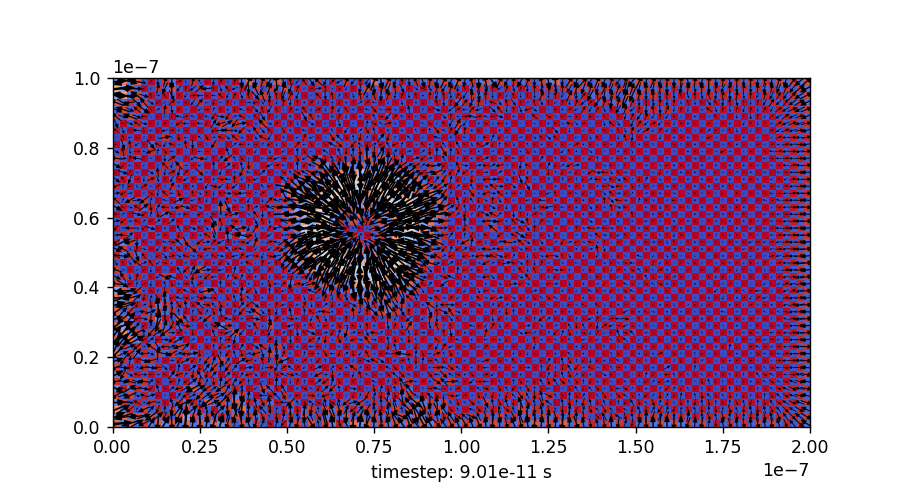

In [7]:
%matplotlib notebook         
# add this line to make visualization possible

real_list = get_real_list(file_name,basename,sampling_rate)


gif_name=file_name.rsplit('/',1)[1].split('.mif')[0]+'.gif'     # name of the oupput .gif file

# print(real_list[0])   # for debug

## read one of the .omf file to get the info of this simulation
f = open(real_list[0],"r")
lines = f.readlines()
xmin, ymin, zmin, xmax, ymax, zmax, xstepsize, ystepsize, zstepsize, basex, basey, total_time = get_simulation_parameter(lines)

u, v, w = assign_uvw(lines)

## initialize and create the canvas
ratio = int((xmax-xmin) // xstepsize)  / int((ymax-ymin) // ystepsize)
fig, ax = plt.subplots(figsize=(ratio*(height*0.9),height))

X=linspace(xmin,xmax,int((xmax-xmin) // xstepsize))
Y=linspace(ymin,ymax,int((ymax-ymin) // ystepsize))
X,Y=meshgrid(X, Y)

x, y = np.meshgrid(np.arange((xmin+basex), (xmax+basex), (xstepsize)),np.arange((ymin+basey), (ymax+basey), (ystepsize)))

I = plt.imshow(w,extent=[np.min(X),np.max(X),np.min(Y),np.max(Y)],cmap='coolwarm')
Q = ax.quiver(x,y,u,v,norm=True,pivot='mid', linewidths=6,scale =25,headlength=5,headaxislength=5.5,headwidth=4.5,minshaft=2.5)

#fig.colorbar(I,extend='max')

# you need to set blit=False, or the first set of arrows never gets
# cleared on subsequent frames
save_gif=False
if __name__ == '__main__':
    #anim = animation.FuncAnimation(fig, update_quiver, fargs=(Q, X, Y), frames=len(real_list), interval=100, blit=True)
    anim = animation.FuncAnimation(fig, update_quiver, fargs=(I, X, Y), frames=len(real_list), interval=50, blit=False)
    if save_gif == True:
        anim.save(gif_name, dpi=50, writer='imagemagick')
    else:
        plt.show()
        #anim.save(gif_name, dpi=5, writer='pillow')

In [10]:
def mmDisp(path_omf):
    """acceppt a file name with path as input, draw the picture using quiver,
        you can also save this figure as a jpg file in the same path.
        using this function in a loop to visualize all the desired .omf file
    """

    f = open(path_omf,"r")
    lines = f.readlines()
    xmin, ymin, zmin, xmax, ymax, zmax, xstepsize, ystepsize, zstepsize, basex, basey, total_time = get_simulation_parameter(lines)
        
    u, v, w = assign_uvw(lines)

    X=linspace(xmin,xmax,int((xmax-xmin) // xstepsize))
    Y=linspace(ymin,ymax,int((ymax-ymin) // ystepsize))
    X,Y=meshgrid(X, Y)

    x, y = np.meshgrid(np.arange((xmin+basex), (xmax+basex), (xstepsize)),
                                  np.arange((ymin+basey), (ymax+basey), (ystepsize)))

    ratio = int((xmax-xmin) // xstepsize)  / int((ymax-ymin) // ystepsize)
    fig, ax = plt.subplots(figsize=(ratio*(height*0.9),height))

    label = ('timestep: '+total_time)
    ax.set_xlabel(label)
    
    #    v,cmap='RdYlBu',
    I = imshow(w,extent=[np.min(X),np.max(X),np.min(Y),np.max(Y)],cmap='coolwarm')
    # uncomment Q to add arrows in each cell
    # Q = quiver(x,y,u,v,norm=True,pivot='mid', linewidths=6,scale =25,headlength=5,headaxislength=5.5,headwidth=4.5,minshaft=2.5)

    matplotlib.use('Agg') # comment this line to show the picture

    jpg_name=path_omf.replace('omf','jpg')
    plt.savefig(jpg_name) # save file as indicated name

    plt. close(0) 

In [11]:
real_list = get_real_list(file_name,basename,sampling_rate)

mmDisp(real_list[0])       # test

## use loop to generate jpg format files from omf files
#for omf in real_list:
#    mmDisp(omf)

### Transform the .omf file into .csv file, read it with panda and visualiza it with plotly: 3D case

In [12]:
import plotly.graph_objects as go
import pandas as pd

In [15]:
file_name = "./Thermal_Ferri_Skm/ZYZ-Oxs_TimeDriver-Spin-000000006-0000713.omf"
f = open(file_name,"r")
lines = f.readlines()        
header='"x","y","z","u","v","w"\n'
indexx=0
indexy=0
indexz=0
content=''
xmin, ymin, zmin, xmax, ymax, zmax, xstepsize, ystepsize, zstepsize, basex, basey, total_time = get_simulation_parameter(lines)
for line in lines:
    if '#' not in line:
        if indexx==(int((xmax-xmin) // xstepsize)):
            indexx=0
            indexy+=1
        if indexy==(int((ymax-ymin) // ystepsize)):
            indexy=0
            indexz+=1
        # Make the direction data for the arrows
        content+=str(indexx)+','
        content+=str(indexy)+','
        content+=str(indexz)+','
        
        content+=str(float(line.split(' ')[1])*abs(float(line.split(' ')[3])))+','
        content+=str(float(line.split(' ')[2])*abs(float(line.split(' ')[3])))+','
        content+=str(float(line.split(' ')[3])*abs(float(line.split(' ')[3])))+'\n'

        '''
        content+=str(float(line.split(' ')[1])*(float(line.split(' ')[3]))/2+0.5)+','
        content+=str(float(line.split(' ')[2])*(float(line.split(' ')[3]))/2+0.5)+','
        content+=str(float(line.split(' ')[3])*(float(line.split(' ')[3]))/2+0.5)+'\n'
        
        content+=line.split(' ')[1]+','
        content+=line.split(' ')[2]+','
        content+=line.split(' ')[3]
        '''
        indexx+=1

filecsv=header+content

csv_name = file_name.replace('.omf','.csv')

with open(csv_name, "w") as file: 
    file.write(filecsv)

In [16]:
## plotly do not support for go.Cone to set colormap for z component of each cell

df = pd.read_csv(csv_name)
fig = go.Figure(data = go.Cone(
    x=df['x'],
    y=df['y'],
    z=df['z'],
    u=df['u'],
    v=df['v'],
    w=df['w'],
    colorscale='Blues',
    sizemode="absolute",
    sizeref=15))

fig.update_layout(scene=dict(aspectmode="data",
                             camera_eye=dict(x=0.05, y=-2.6, z=2)),
                            # margin=dict(t=0, b=0, l=0, r=0)
                 )

#fig.update_layout(scene=dict(aspectratio=dict(x=1, y=1, z=0.8),
#                             camera_eye=dict(x=1.2, y=1.2, z=0.6)))

fig.show()